# Práctica Ipython
## Punto 2: insertion sort y merge sort

La implementación del merge sort fue tomada de la página web: http://interactivepython.org/runestone/static/pythonds/SortSearch/TheMergeSort.html

In [1]:
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1

La función pruebasMerge crea 10 arreglos de tamaño 10, 20, ... , 100 todos desordenados.  Luego aplica el Merge Sort a cada uno de los arreglos y retorna los tiempos.

In [2]:
from random import shuffle
import time

def pruebasMerge():
    listas = []
    aux = (range(10))
    shuffle(aux)
    listas.append(aux)
    aux = (range(20))
    shuffle(aux)
    listas.append(aux)
    aux = (range(30))
    shuffle(aux)
    listas.append(aux)
    aux = (range(40))
    shuffle(aux)
    listas.append(aux)
    aux = (range(50))
    shuffle(aux)
    listas.append(aux)
    aux = (range(60))
    shuffle(aux)
    listas.append(aux)
    aux = (range(70))
    shuffle(aux)
    listas.append(aux)
    aux = (range(80))
    shuffle(aux)
    listas.append(aux)
    aux = (range(90))
    shuffle(aux)
    listas.append(aux)
    aux = (range(100))
    shuffle(aux)
    listas.append(aux)

    tiemposMerge = []
    for node in range(10):
        tiempoInicial=time.clock()
        #print(listas[node])
        mergeSort(listas[node])
        tiempos=time.clock()-tiempoInicial
        #print tiempos
        tiemposMerge.append(tiempos)
    return tiemposMerge

Se realizó la prueba 1000 veces para tener un tiempo promedio más preciso.

In [3]:
tiemposMerge = []
for i in range(10):
    tiemposMerge.append(0)

for i in range(1000):
    aux = pruebasMerge()
    for n in range(10):
        tiemposMerge[n] += aux[n]

print tiemposMerge

[0.023570908959538752, 0.05349638981166429, 0.08729315517487868, 0.12175087155217573, 0.16215961022774486, 0.19679056966587946, 0.23585934305574036, 0.2745943567099246, 0.3168890636828352, 0.35940915084626424]


Se graficó el resultado obtenido. Se puede observa que tiene un crecimiento lineal.

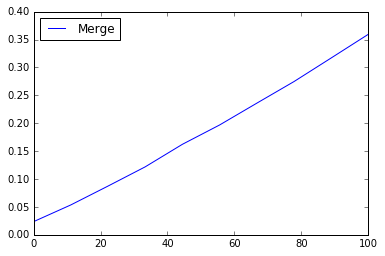

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math
%matplotlib inline


x = np.linspace(0,100,10,endpoint=True)
f1 = interp1d(x,tiemposMerge)
plt.plot(x,f1(x))
plt.legend(['Merge'],loc='best')

Para el analisis de insertion sort, se siguió los mismos pasos que con el algoritmo anterior. La implementación fue tomada del Cormen.

In [5]:
def insertionSort(n):
    j=1
    while j<len(n):
        llave=n[j]
        i=j-1
        while i>=0 and n[i]>llave:
            n[i+1]=n[i]
            i=i-1
        n[i+1]=llave
        j=j+1

In [6]:
from random import shuffle
import time

def pruebasInsertion():
    listas = []
    aux = (range(10))
    shuffle(aux)
    listas.append(aux)
    aux = (range(20))
    shuffle(aux)
    listas.append(aux)
    aux = (range(30))
    shuffle(aux)
    listas.append(aux)
    aux = (range(40))
    shuffle(aux)
    listas.append(aux)
    aux = (range(50))
    shuffle(aux)
    listas.append(aux)
    aux = (range(60))
    shuffle(aux)
    listas.append(aux)
    aux = (range(70))
    shuffle(aux)
    listas.append(aux)
    aux = (range(80))
    shuffle(aux)
    listas.append(aux)
    aux = (range(90))
    shuffle(aux)
    listas.append(aux)
    aux = (range(100))
    shuffle(aux)
    listas.append(aux)

    tiemposInsertion = []
    for node in range(10):
        tiempoInicial=time.clock()
        #print(listas[node])
        insertionSort(listas[node])
        tiempos=time.clock()-tiempoInicial
        #print tiempos
        tiemposInsertion.append(tiempos)
    return tiemposInsertion

In [7]:
tiemposInsertion = []
for i in range(10):
    tiemposInsertion.append(0)

for i in range(1000):
    aux = pruebasInsertion()
    for n in range(10):
        tiemposInsertion[n] += aux[n]

print tiemposInsertion

[0.00877627998707542, 0.026169554872081058, 0.05309653497454114, 0.08997678050351965, 0.13669616451356692, 0.19093437946962943, 0.25355394591860403, 0.32949352268007637, 0.41144077468384666, 0.5058697376393866]


En la gráfica del Insertion Sort, notamos que su crecimiento es cuadrático.

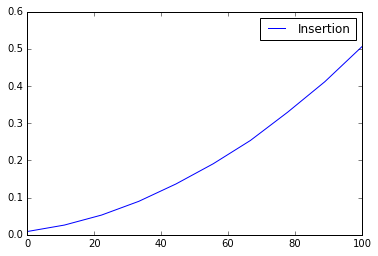

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math
%matplotlib inline


x = np.linspace(0,100,10,endpoint=True)
f2 = interp1d(x,tiemposInsertion)
plt.plot(x,f2(x))
plt.legend(['Insertion'],loc='best')

Al analizar las gráficas y los resultados de tiempo en cada algoritmo, encontramos que el tamaño promedio donde se cruzan las 2 funciones es 65, por lo cual se diseñó la función merge_insertion, que realiza Merge Sort para arreglos mayores a 65 e Insertion Sort para arreglos menores.

In [9]:
def merge_insertion(lista):
    if(len(lista)>65):
        return mergeSort(lista)
    else:
        return insertionSort(lista)

In [10]:
from random import shuffle
import time

def pruebas_merge_insertion():
    listas = []
    aux = (range(10))
    shuffle(aux)
    listas.append(aux)
    aux = (range(20))
    shuffle(aux)
    listas.append(aux)
    aux = (range(30))
    shuffle(aux)
    listas.append(aux)
    aux = (range(40))
    shuffle(aux)
    listas.append(aux)
    aux = (range(50))
    shuffle(aux)
    listas.append(aux)
    aux = (range(60))
    shuffle(aux)
    listas.append(aux)
    aux = (range(70))
    shuffle(aux)
    listas.append(aux)
    aux = (range(80))
    shuffle(aux)
    listas.append(aux)
    aux = (range(90))
    shuffle(aux)
    listas.append(aux)
    aux = (range(100))
    shuffle(aux)
    listas.append(aux)

    tiempos_merge_Insertion = []
    for node in range(10):
        tiempoInicial=time.clock()
        #print(listas[node])
        merge_insertion(listas[node])
        tiempos=time.clock()-tiempoInicial
        #print tiempos
        tiempos_merge_Insertion.append(tiempos)
    return tiempos_merge_Insertion

In [11]:
tiempos_merge_Insertion = []
for i in range(10):
    tiempos_merge_Insertion.append(0)

for i in range(1000):
    aux = pruebas_merge_insertion()
    for n in range(10):
        tiempos_merge_Insertion[n] += aux[n]

print tiempos_merge_Insertion

[0.009076786907755263, 0.026529998965433066, 0.05333997842263294, 0.0905203203436784, 0.13569899059235446, 0.19042039768723384, 0.23196301630124871, 0.26857600772454404, 0.31112318977421793, 0.3508964302076869]


En la gráfica vemos que inicialmente tiende a presentar un crecimiento cuadrático, pero luego se linealiza.

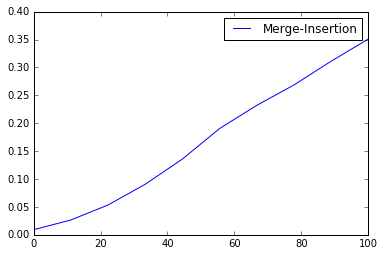

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math
%matplotlib inline


x = np.linspace(0,100,10,endpoint=True)
f3 = interp1d(x,tiempos_merge_Insertion)
plt.plot(x,f3(x))
plt.legend(['Merge-Insertion'],loc='best')

Finalmente, al graficar las 3 funciones, vemos que se obtiene el resultado esperado en la práctica.

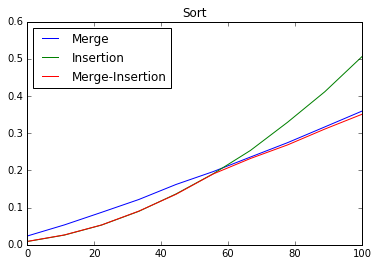

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import math
%matplotlib inline


x = np.linspace(0,100,10,endpoint=True)
f1 = interp1d(x,tiemposMerge,kind='quadratic')
f2 = interp1d(x,tiemposInsertion,kind='quadratic')
f3 = interp1d(x,tiempos_merge_Insertion)
plt.plot(x,f1(x),x,f2(x),x,f3(x))
plt.title('Sort')
plt.legend(['Merge','Insertion','Merge-Insertion'],loc='best')